In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def parse_init(init_filepath):
    parameters = dict()
    with open(init_filepath, 'r') as f_in:
        for line in f_in:
            line_ls = line.split()
            
            if line_ls[0] == 'N:':
                parameters['N'] = int(line_ls[1])
            elif line_ls[0] == 'NMEAS:':
                parameters['NMEAS'] = int(line_ls[1])
            elif line_ls[0] == 'GEOM:':
                parameters['GEOM'] = line_ls[1]
    return parameters

def parse_g2_list(g2_list):
    return [x.replace('-', 'n').replace('.', 'd') for x in g2_list]

def parameters_to_name(parameters, g2):
    return parameters['GEOM'] + 'N' + str(parameters['N']) + 'g' + g2



In [30]:
path = '../data/20230528_1/'
init_filepath = path + 'init.txt'
parameters = parse_init(init_filepath)
print(parameters)

{'GEOM': 'p1q0', 'N': 1024, 'NMEAS': 1000}


In [31]:
g2_list = ['-3.5']
g2_list = parse_g2_list(g2_list)
print(g2_list)

['n3d5']


In [32]:
for g2 in g2_list:
    filename = parameters_to_name(parameters, g2)
    S_data_filepath = path + g2 + '/' + filename + '_S.txt'
    V_data_filepath = path + g2 + '/' + filename + '_V.txt'

    S_list = []
    with open(S_data_filepath, 'r') as S_in:
        for line in S_in:
            S_list.append(float(line))
    
    V_list = []
    flat_V_list = []
    with open(V_data_filepath, 'r') as V_in:
        for line in V_in:
            V_list.append([float(x) for x in line.split()])
            for x in line.split():
                flat_V_list.append(float(x))


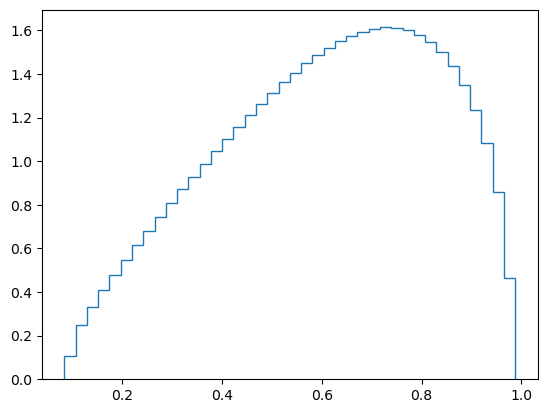

In [33]:
counts, bins = np.histogram(flat_V_list, bins=40, density=True)
plt.stairs(counts, bins)